In [1]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df18=pd.read_csv('./dataset/18기데이터셋찐막.csv',encoding='cp949')
df17=pd.read_csv('./dataset/17기데이터셋찐막.csv',encoding='cp949')
df18

,고객번호,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,RFM등급,A_구매금액,B_구매금액,C_구매금액,D_구매금액,...,기호품CV_S,의류잡화CV_S,화장품CV_S,문구류CV_S,레저취미CV_S,분기변동지수,객단가변동지수,평일_CV_S,휴일_CV_S,증감확인
0,1,1.998229,3.784157,-0.652472,-0.424659,1.4,0.929296,-0.248486,-0.120202,-0.127978,...,0.586065,-1.448342,-0.363105,-1.323632,0.279975,0.256111,-0.595431,-0.212840,-0.127148,0
1,2,1.998229,1.828781,-0.652472,-0.424659,1.9,1.229972,-0.274863,-0.193895,0.715572,...,0.477038,-0.595789,-1.006358,-1.323632,-1.159604,-0.069096,-0.532508,-0.171378,-0.581635,0
2,3,1.998229,-0.405935,-0.652472,-0.424659,2.3,-0.443446,-0.284499,0.040243,-0.127978,...,-1.121518,3.432013,-1.692524,-1.323632,-1.815644,-0.162036,-0.149621,0.104904,0.336230,0
3,4,1.998229,0.432083,-0.652472,-0.424659,3.0,-0.203454,-0.206219,-0.132425,-0.127978,...,-0.399566,-0.464030,0.206798,-1.323632,0.268642,-0.719511,-0.595431,-0.423325,0.165701,0
4,6,1.998229,-0.405935,-0.652472,-0.424659,2.5,-0.186322,0.131975,-0.155648,-0.127978,...,1.105097,-0.711152,-0.852221,1.633736,1.163341,-0.905390,-1.230008,-0.923000,-0.125685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,-2.144017,-0.405935,1.068660,-0.084953,3.0,-0.400862,-0.233634,-0.191939,3.564123,...,-0.361332,3.432013,-1.692524,0.585925,1.588049,-0.115566,-0.532508,-0.218433,-0.677083,0
18862,19334,-1.108456,7.974248,1.068660,-0.424659,1.6,-0.437690,0.258621,-0.134567,-0.127978,...,0.917412,0.751998,0.258188,-0.084726,-0.557044,0.488460,-1.675818,0.980973,0.012055,0
18863,19335,-1.108456,-0.405935,1.068660,-0.424659,2.8,-0.423405,0.389109,-0.070952,-0.127978,...,-0.670906,-0.465980,-0.157816,-0.945261,-0.032609,-0.673041,0.610801,-0.534499,-0.341990,1
18864,19336,-1.108456,-0.405935,-0.652472,-0.424659,1.9,0.061776,-0.283601,-0.193895,0.039023,...,2.751789,-0.477107,-0.063757,-1.323632,-1.815644,-3.088983,-0.595431,0.678371,-0.320248,1


In [5]:
X_train = df17.iloc[:,1:-1]
X_test = df18.iloc[:,1:-1]
y_train =df17[['증감']]
y_test = df18[['증감확인']]  

<AxesSubplot:>

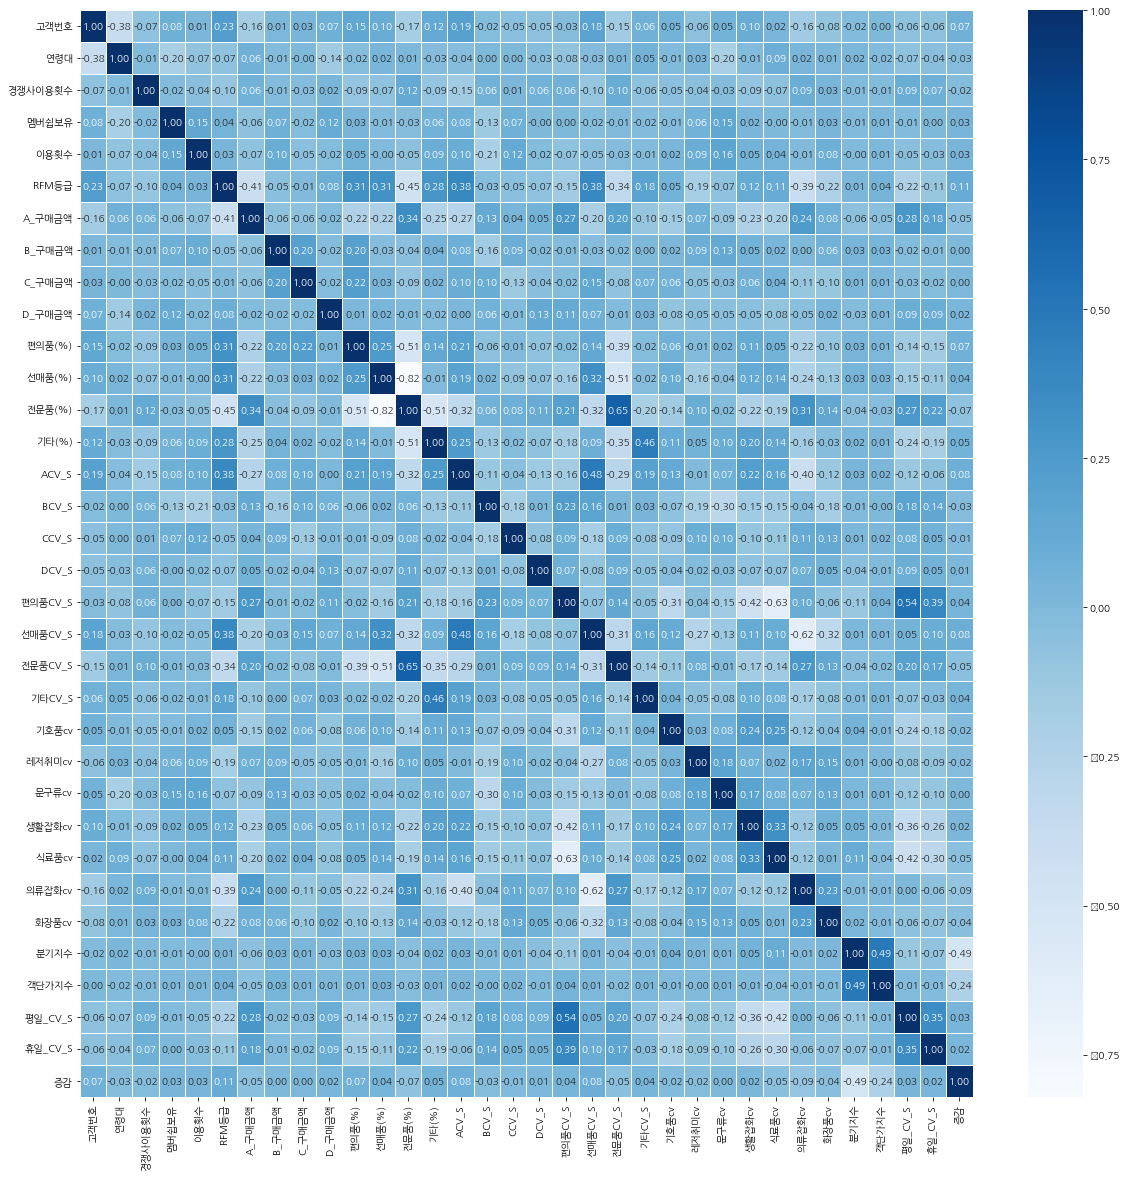

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
dff=df17.iloc[1:]
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,20))
sns.heatmap(data =dff.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

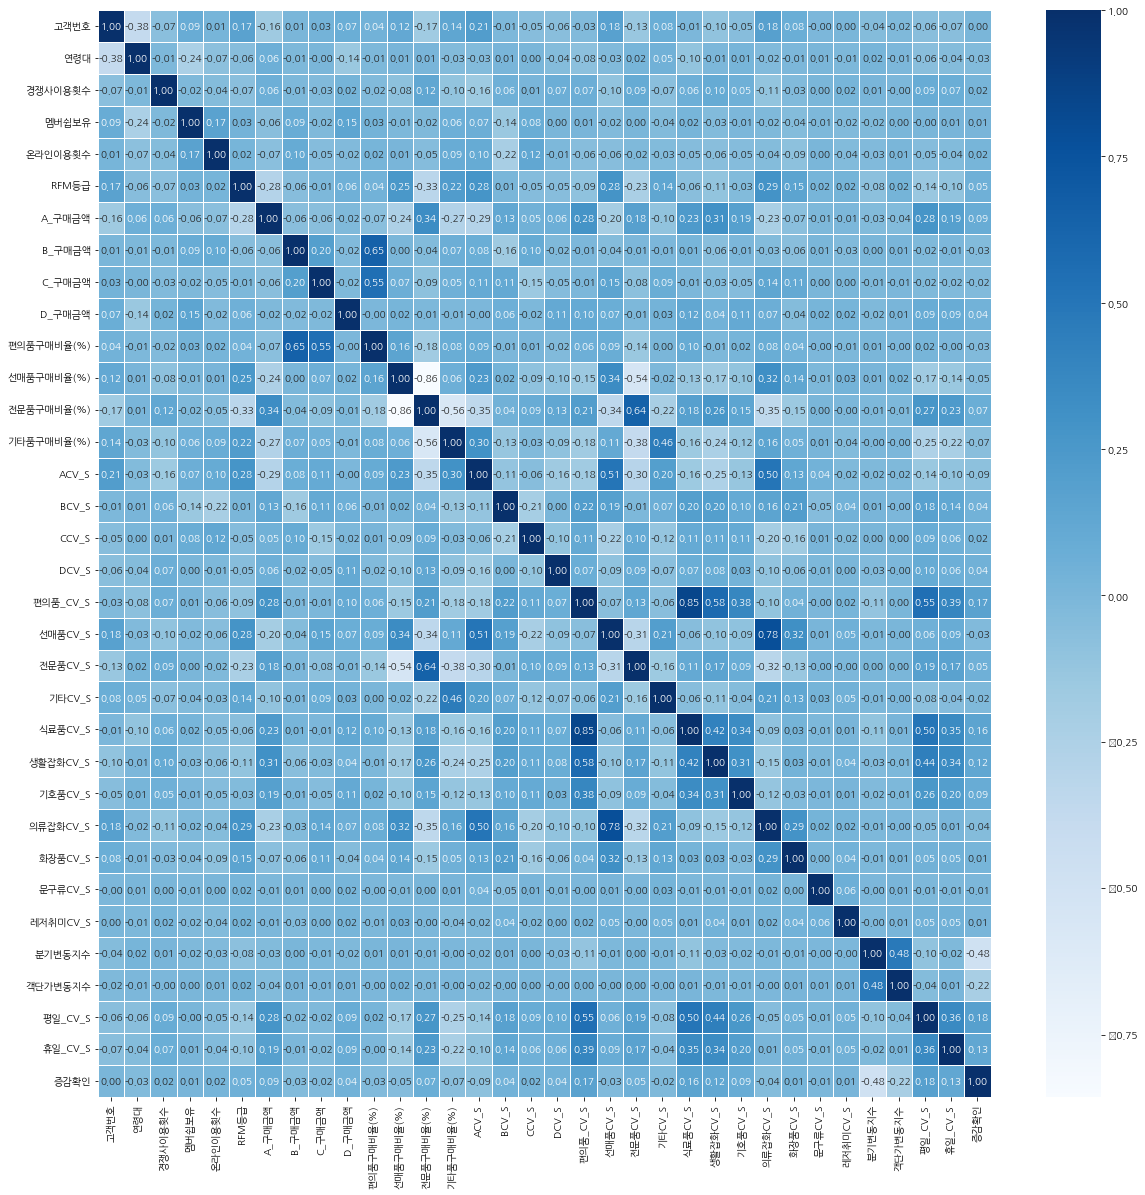

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
dff=df18.iloc[1:]
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(20,20))
sns.heatmap(data =dff.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [27]:
X_tr, X_te, y_tr, y_te = train_test_split(X_test, y_test, test_size = 0.2)

In [32]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_tr,y_tr)
pred = rf_clf.predict(X_te)
accuracy = accuracy_score(y_te,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

랜덤포레스트 정확도: 0.7353 



In [ ]:
params = {
    'n_estimators':[10,50,100],
    'max_depth' : [6,8,10,12],
   'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,14,20]
}
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_tr,y_tr)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
print(accuracy_score(y_te,grid_cv.predict(X_te)))
print(accuracy_score(y_test,grid_cv.predict(X_test)))

In [34]:
rf_clf = RandomForestClassifier(max_depth=6,min_samples_leaf=12,min_samples_split=8,n_estimators=100)
rf_clf.fit(X_tr,y_tr)
pred = rf_clf.predict(X_te)
accuracy = accuracy_score(y_te,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

랜덤포레스트 정확도: 0.7390 



In [10]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [11]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
        
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [13]:
# Permutation Importance
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier
X=X_test
y=y_test
#미리 사용할 알고리즘을 fit 해야한다
model = RandomForestClassifier(max_depth=6,min_samples_leaf=12,min_samples_split=8,n_estimators=100).fit(X, y)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X, y) 
eli5.show_weights(perm, top = 32, feature_names = X.columns.tolist())

Weight,Feature
0.1682 ± 0.0044,분기변동지수
0.0083 ± 0.0015,A_구매금액
0.0078 ± 0.0015,객단가변동지수
0.0045 ± 0.0013,편의품_CV_S
0.0041 ± 0.0027,평일_CV_S
0.0034 ± 0.0009,RFM등급
0.0023 ± 0.0016,휴일_CV_S
0.0018 ± 0.0010,식료품CV_S
0.0017 ± 0.0005,B_구매금액
0.0016 ± 0.0011,편의품구매비율(%)


In [67]:
df18_d.columns

Index(['고객번호', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급', 'A_구매금액',
       'B_구매금액', 'C_구매금액', 'D_구매금액', '편의품구매비율(%)', '선매품구매비율(%)', '전문품구매비율(%)',
       '기타품구매비율(%)', 'ACV_S', 'BCV_S', 'CCV_S', 'DCV_S', '편의품_CV_S', '선매품CV_S',
       '전문품CV_S', '기타CV_S', '식료품CV_S', '생활잡화CV_S', '기호품CV_S', '의류잡화CV_S',
       '화장품CV_S', '문구류CV_S', '레저취미CV_S', '분기변동지수', '객단가변동지수', '평일_CV_S',
       '휴일_CV_S', '증감확인'],
      dtype='object')

In [55]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
X_fe = X_test[[ 'RFM등급',]]
X_fa= X_test[['RFM등급', 'A_구매금액', 'B_구매금액','C_구매금액', '편의품구매비율(%)', '전문품구매비율(%)','기타품구매비율(%)',
              'ACV_S', 'BCV_S', 'CCV_S', '편의품_CV_S', '선매품CV_S','전문품CV_S',  '식료품CV_S', '생활잡화CV_S', '기호품CV_S', 
              '화장품CV_S', '분기변동지수', '평일_CV_S','휴일_CV_S']]

for i in X_fa.columns:
    new_c = i + '_log'
    X_fe[new_c] = np.log1p(X_fa[i])

X_fe=X_fe.fillna(0)

In [65]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
X_fe = df18_d[[ 'RFM등급']]
X_fa= df18_d[['RFM등급', 'A_구매금액', 'B_구매금액','C_구매금액', '편의품구매비율(%)', '전문품구매비율(%)','기타품구매비율(%)',
              'ACV_S', 'BCV_S', 'CCV_S', '편의품_CV_S', '선매품CV_S','전문품CV_S',  '식료품CV_S', '생활잡화CV_S', '기호품CV_S', 
              '화장품CV_S', '분기변동지수', '평일_CV_S','휴일_CV_S']]

for i in X_fa.columns:
    new_c = i + '_log'
    X_fe[new_c] = np.log1p(X_fa[i])

X_fe=X_fe.fillna(0)

In [46]:
df18_d = df18[df18['증감확인']==0]

In [47]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
X_fe = df18_d[[ 'RFM등급']]
X_fa=df18_d.iloc[:,1:-1]

# for i in X_fa.columns:
#     new_c = i + '_log'
#     X_fe[new_c] = np.log1p(X_fa[i])

# X_fe=X_fe.fillna(0)

In [126]:
df12 = pd.read_csv('./dataset/18기데이터셋찐막.csv',encoding='cp949')
df12=df12[['고객번호','A_구매금액','B_구매금액','C_구매금액','D_구매금액']]

In [132]:
df1 = pd.read_csv('./dataset/1-8기최최종.csv',encoding='cp949')
df1 = df1.drop('Unnamed: 0',axis=1)
df1d = df1[df1['증감확인']==0]

In [134]:
df1d= pd.merge(df1d,df12,how='left',on='고객번호')

In [135]:
df1d.columns

Index(['고객번호', '증감확인', '성별', '연령대', '경쟁사이용횟수', '멤버쉽보유', '온라인이용횟수', 'RFM등급',
       '식료품_NET', '식료품_ABS', '의류_NET', '의류_ABS', '생활_NET', '생활_ABS', '화장품_NET',
       '화장품_ABS', '기호품_NET', '기호품_ABS', '휴일_CV_S', '편의품_CV_S', '선매품CV_S',
       '전문품CV_S', '기타CV_S', '매출증감지수', '객단가증감률', 'A_구매금액', 'B_구매금액', 'C_구매금액',
       'D_구매금액'],
      dtype='object')

In [145]:
df1d_n = df1d[['고객번호','A_구매금액', '기타CV_S', '식료품_NET','의류_NET', '생활_NET', 'RFM등급', '휴일_CV_S', '편의품_CV_S','선매품CV_S',
               '객단가증감률','B_구매금액','C_구매금액']]
df1d_n

,고객번호,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,0,0,-4,1.4,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,0,1,0,1.9,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,0,0,0,2.3,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,0,0,-1,3.0,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
4,10,-0.372333,-0.178393,0,0,0,1.8,0.244338,-1.292360,-0.309260,0.000107,-0.159392,0.682482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,19325,-0.230169,0.147817,0,0,-1,2.7,0.721548,1.097787,0.259730,0.670236,-0.259116,-0.193253
10744,19327,-0.444462,2.437714,0,1,0,2.1,0.535001,0.574083,2.658574,-0.670022,-0.280802,0.359896
10745,19332,-0.440903,2.437714,1,1,0,2.6,0.658519,0.082950,1.370420,1.340365,-0.275204,0.803287
10746,19333,-0.400862,-0.718081,0,-1,-1,3.0,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939


In [146]:
# stcol = df1d_n.columns[1:]
stcol = ['식료품_NET','의류_NET','생활_NET','RFM등급']

for i in stcol:
    sc = StandardScaler()
    sc.fit(df1d_n[[i]])
    df1d_n[i] = sc.transform(df1d_n[[i]])
df1d_n

,고객번호,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.929296,-0.849117,-0.144455,0.238970,-3.296500,-1.739425,0.534529,0.206334,-0.790094,-0.670022,-0.248486,-0.120202
1,2,1.229972,0.225322,-0.144455,1.282634,-0.051626,-0.792279,0.403153,0.129422,-0.835259,-0.670022,-0.274863,-0.193895
2,3,-0.443446,-1.599918,-0.144455,0.238970,-0.051626,-0.034562,0.668476,-0.079951,2.588805,0.000107,-0.284499,0.040243
3,4,-0.203454,-0.660012,-0.144455,0.238970,-0.862844,1.291443,0.619182,-0.449221,-0.516154,-0.670022,-0.206219,-0.132425
4,10,-0.372333,-0.178393,-0.144455,0.238970,-0.051626,-0.981708,0.244338,-1.292360,-0.309260,0.000107,-0.159392,0.682482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,19325,-0.230169,0.147817,-0.144455,0.238970,-0.862844,0.723155,0.721548,1.097787,0.259730,0.670236,-0.259116,-0.193253
10744,19327,-0.444462,2.437714,-0.144455,1.282634,-0.051626,-0.413420,0.535001,0.574083,2.658574,-0.670022,-0.280802,0.359896
10745,19332,-0.440903,2.437714,0.854647,1.282634,-0.051626,0.533726,0.658519,0.082950,1.370420,1.340365,-0.275204,0.803287
10746,19333,-0.400862,-0.718081,-0.144455,-0.804693,-0.862844,1.291443,0.375562,0.660101,1.414476,-0.670022,-0.233634,-0.191939


In [147]:
# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation

li = df1d_n.columns[1:]
for i in li:
#     new_c = i + '_log'
    df1d_n[i] = np.log1p(df1d_n[i])

df1d_n=df1d_n.fillna(0)
df1d_n

,고객번호,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,1,0.657155,-1.891250,-0.156017,0.214281,0.000000,0.000000,0.428224,0.187586,-1.561094,-1.108731,-0.285666,-0.128063
1,2,0.801989,0.203203,-0.156017,0.825330,-0.053006,-1.571560,0.338722,0.121706,-1.803379,-1.108731,-0.321395,-0.215542
2,3,-0.585991,0.000000,-0.156017,0.214281,-0.053006,-0.035173,0.511911,-0.083328,1.277819,0.000107,-0.334772,0.039455
3,4,-0.227471,-1.078845,-0.156017,0.214281,-1.986639,0.829182,0.481921,-0.596421,-0.725989,-1.108731,-0.230947,-0.142053
4,10,-0.465746,-0.196493,-0.156017,0.214281,-0.053006,-4.001309,0.218604,0.000000,-0.369992,0.000107,-0.173630,0.520270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,19325,-0.261585,0.137862,-0.156017,0.214281,-1.986639,0.544157,0.543224,0.740883,0.230897,0.512965,-0.299911,-0.214745
10744,19327,-0.587818,1.234807,-0.156017,0.825330,-0.053006,-0.533447,0.428531,0.453673,1.297074,-1.108731,-0.329618,0.307408
10745,19332,-0.581432,1.234807,0.617695,0.825330,-0.053006,0.427700,0.505925,0.079689,0.863067,0.850307,-0.321865,0.589611
10746,19333,-0.512264,-1.266137,-0.156017,-1.633180,-1.986639,0.829182,0.318863,0.506878,0.881482,-1.108731,-0.266095,-0.213118


In [151]:
df1d_n = df1d_n.iloc[:,1:]

array([[<AxesSubplot:title={'center':'고객번호'}>,
        <AxesSubplot:title={'center':'A_구매금액'}>,
        <AxesSubplot:title={'center':'기타CV_S'}>,
        <AxesSubplot:title={'center':'식료품_NET'}>],
       [<AxesSubplot:title={'center':'의류_NET'}>,
        <AxesSubplot:title={'center':'생활_NET'}>,
        <AxesSubplot:title={'center':'RFM등급'}>,
        <AxesSubplot:title={'center':'휴일_CV_S'}>],
       [<AxesSubplot:title={'center':'편의품_CV_S'}>,
        <AxesSubplot:title={'center':'선매품CV_S'}>,
        <AxesSubplot:title={'center':'객단가변동률'}>,
        <AxesSubplot:title={'center':'B_구매금액'}>],
       [<AxesSubplot:title={'center':'C_구매금액'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

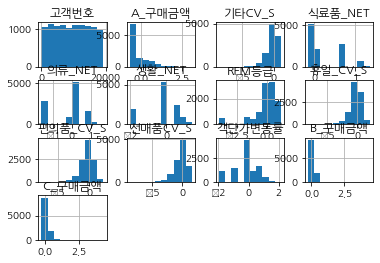

In [118]:
df1d_n.hist()

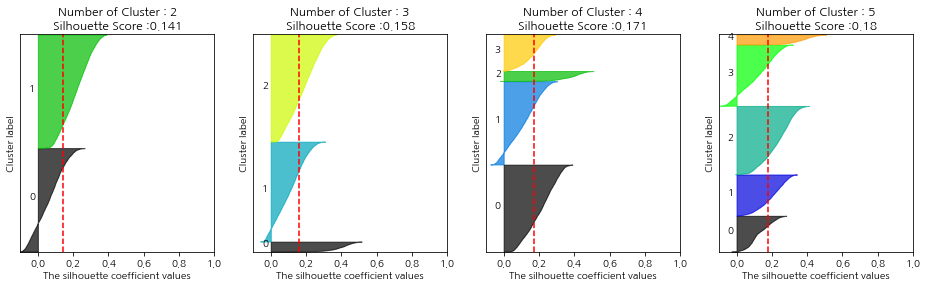

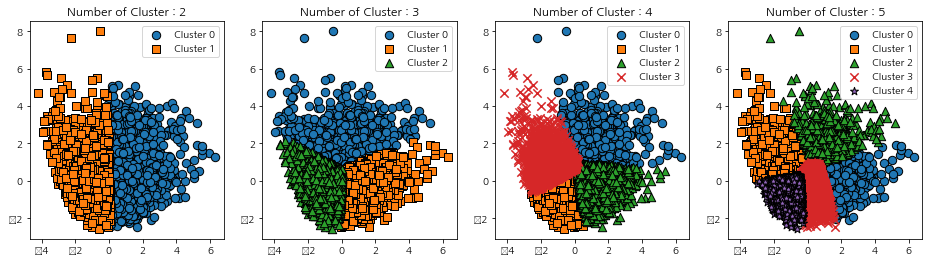

In [152]:
import warnings
warnings.filterwarnings('ignore')
# X_features = df1d_n.values
# X_features_scaled = StandardScaler().fit_transform(X_features)

visualize_silhouette([2,3,4,5],df1d_n)
visualize_kmeans_plot_multi([2,3,4,5],df1d_n)

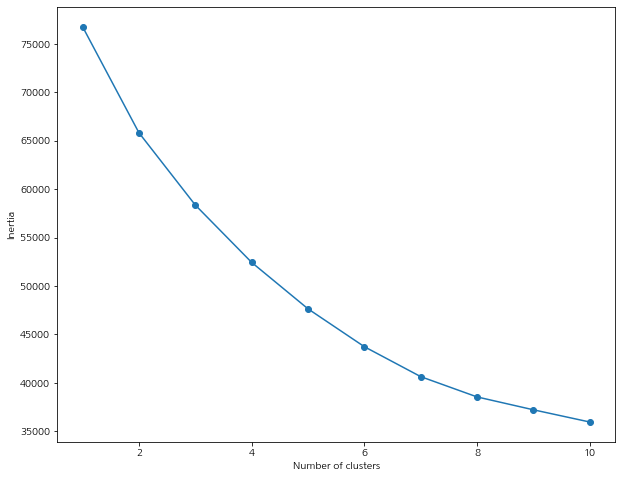

In [153]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(df1d_n)
    inertia.append(kmeans_plus.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [154]:
df1d_n

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액
0,0.657155,-1.891250,-0.156017,0.214281,0.000000,0.000000,0.428224,0.187586,-1.561094,-1.108731,-0.285666,-0.128063
1,0.801989,0.203203,-0.156017,0.825330,-0.053006,-1.571560,0.338722,0.121706,-1.803379,-1.108731,-0.321395,-0.215542
2,-0.585991,0.000000,-0.156017,0.214281,-0.053006,-0.035173,0.511911,-0.083328,1.277819,0.000107,-0.334772,0.039455
3,-0.227471,-1.078845,-0.156017,0.214281,-1.986639,0.829182,0.481921,-0.596421,-0.725989,-1.108731,-0.230947,-0.142053
4,-0.465746,-0.196493,-0.156017,0.214281,-0.053006,-4.001309,0.218604,0.000000,-0.369992,0.000107,-0.173630,0.520270
...,...,...,...,...,...,...,...,...,...,...,...,...
10743,-0.261585,0.137862,-0.156017,0.214281,-1.986639,0.544157,0.543224,0.740883,0.230897,0.512965,-0.299911,-0.214745
10744,-0.587818,1.234807,-0.156017,0.825330,-0.053006,-0.533447,0.428531,0.453673,1.297074,-1.108731,-0.329618,0.307408
10745,-0.581432,1.234807,0.617695,0.825330,-0.053006,0.427700,0.505925,0.079689,0.863067,0.850307,-0.321865,0.589611
10746,-0.512264,-1.266137,-0.156017,-1.633180,-1.986639,0.829182,0.318863,0.506878,0.881482,-1.108731,-0.266095,-0.213118


In [155]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df1d_n.iloc[:,1:])
df1d_n['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

In [156]:
df1d_n

,A_구매금액,기타CV_S,식료품_NET,의류_NET,생활_NET,RFM등급,휴일_CV_S,편의품_CV_S,선매품CV_S,객단가증감률,B_구매금액,C_구매금액,cluster
0,0.657155,-1.891250,-0.156017,0.214281,0.000000,0.000000,0.428224,0.187586,-1.561094,-1.108731,-0.285666,-0.128063,1
1,0.801989,0.203203,-0.156017,0.825330,-0.053006,-1.571560,0.338722,0.121706,-1.803379,-1.108731,-0.321395,-0.215542,1
2,-0.585991,0.000000,-0.156017,0.214281,-0.053006,-0.035173,0.511911,-0.083328,1.277819,0.000107,-0.334772,0.039455,2
3,-0.227471,-1.078845,-0.156017,0.214281,-1.986639,0.829182,0.481921,-0.596421,-0.725989,-1.108731,-0.230947,-0.142053,1
4,-0.465746,-0.196493,-0.156017,0.214281,-0.053006,-4.001309,0.218604,0.000000,-0.369992,0.000107,-0.173630,0.520270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10743,-0.261585,0.137862,-0.156017,0.214281,-1.986639,0.544157,0.543224,0.740883,0.230897,0.512965,-0.299911,-0.214745,2
10744,-0.587818,1.234807,-0.156017,0.825330,-0.053006,-0.533447,0.428531,0.453673,1.297074,-1.108731,-0.329618,0.307408,2
10745,-0.581432,1.234807,0.617695,0.825330,-0.053006,0.427700,0.505925,0.079689,0.863067,0.850307,-0.321865,0.589611,2
10746,-0.512264,-1.266137,-0.156017,-1.633180,-1.986639,0.829182,0.318863,0.506878,0.881482,-1.108731,-0.266095,-0.213118,1
